In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
featureNames = df.columns
featureNames

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'thall']].values
X[:5]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   0,   1],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   0,   2],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   0,   2],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0,   2],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0,   2]],
      dtype=int64)

In [7]:
y = df['output'].values
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize

In [8]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
X = scaler.fit(X).transform(X.astype(float))
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055, -0.71442887,
        -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055, -0.71442887,
        -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055, -0.71442887,
        -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.71442887,
        -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.71442887,
        -0.51292188]])

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 11) (242,)
Test set: (61, 11) (61,)


### KNN ------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [12]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[0 0 1 1 0]
[1 0 1 1 0]


#### Evaluation

In [13]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8801652892561983
Test set Accuracy:  0.8360655737704918


In [14]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.75409836, 0.75409836, 0.83606557, 0.81967213, 0.81967213,
       0.80327869, 0.80327869, 0.81967213, 0.81967213])

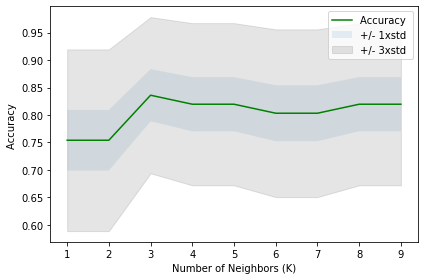

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="black")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8360655737704918 with k= 3


###  DecisionTree ------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
heartattackTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
heartattackTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
predTree = heartattackTree.predict(X_test)
print (predTree [:5])
print (y_test [:5])

[0 0 1 1 0]
[1 0 1 1 0]


#### Evaluation

In [20]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8524590163934426


In [21]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import graphviz
%matplotlib inline 

In [22]:
dot_data = StringIO()
filename = "heartattackTree.png"
out=tree.export_graphviz(heartattackTree,feature_names=featureNames[0:11], out_file=dot_data, class_names= np.unique(y_train.astype(str)), filled=True,  special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

###  Logistic Regression --------------------------------------------------------------------------------------------------------------------------------

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
yhat = LR.predict(X_test)
print(y_test)
print(yhat)

[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]
[1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1]


In [25]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.44867519, 0.55132481],
       [0.66639762, 0.33360238],
       [0.40484782, 0.59515218],
       [0.18606248, 0.81393752],
       [0.36570129, 0.63429871],
       [0.54918323, 0.45081677],
       [0.45656751, 0.54343249],
       [0.27819739, 0.72180261],
       [0.43591978, 0.56408022],
       [0.38056968, 0.61943032],
       [0.35216781, 0.64783219],
       [0.2437311 , 0.7562689 ],
       [0.34697694, 0.65302306],
       [0.66075714, 0.33924286],
       [0.34015552, 0.65984448],
       [0.75295814, 0.24704186],
       [0.35891418, 0.64108582],
       [0.34415441, 0.65584559],
       [0.76114729, 0.23885271],
       [0.44255415, 0.55744585],
       [0.28987273, 0.71012727],
       [0.30522244, 0.69477756],
       [0.71491303, 0.28508697],
       [0.45324554, 0.54675446],
       [0.44785973, 0.55214027],
       [0.69235698, 0.30764302],
       [0.62147649, 0.37852351],
       [0.24878072, 0.75121928],
       [0.51382098, 0.48617902],
       [0.82822651, 0.17177349],
       [0.

#### Evaluation

In [35]:
print(metrics.jaccard_score(y_test, yhat,pos_label=0))
print(metrics.jaccard_score(y_test, yhat,pos_label=1))

0.7407407407407407
0.8292682926829268


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


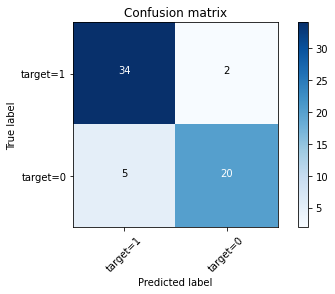

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [42]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.45507337183595997

###  SVM ------------------------------------------------------------------------------------------------------------------------------------------------------

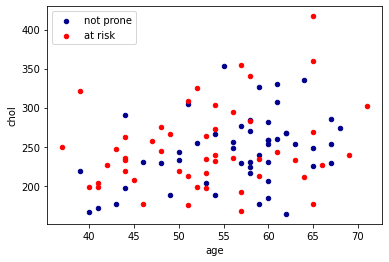

In [46]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='chol', color='DarkBlue', label='not prone');
df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='chol', color='Red', label='at risk', ax=ax);
plt.show()

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [50]:
yhat = clf.predict(X_test)
print(y_test)
print(yhat)

[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]
[0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]


#### Evaluation

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.94      0.81      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

Confusion matrix, without normalization
[[23  2]
 [ 7 29]]


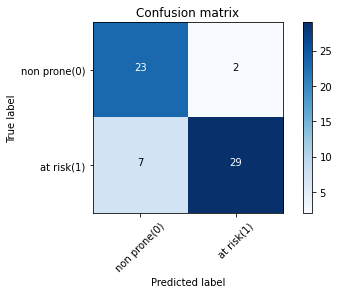

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non prone(0)','at risk(1)'],normalize= False,  title='Confusion matrix')

In [57]:
metrics.f1_score(y_test, yhat, average='weighted') 

0.853660164156861

In [64]:
print(metrics.jaccard_score(y_test, yhat,pos_label=0))
print(metrics.jaccard_score(y_test, yhat,pos_label=1))

0.71875
0.7631578947368421
